Langkah 1 - Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Langkah 2 - Load Dataset

In [2]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Inspect info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Langkah 3 - Slicing Fitur

In [3]:
# Slicing - Select Annual Income and Spending Score only
X = df.iloc[:, [3, 4]].values # property values will take only the 'values' -> return in ndarray

Langkah 4 - Visualisasi Dendogram

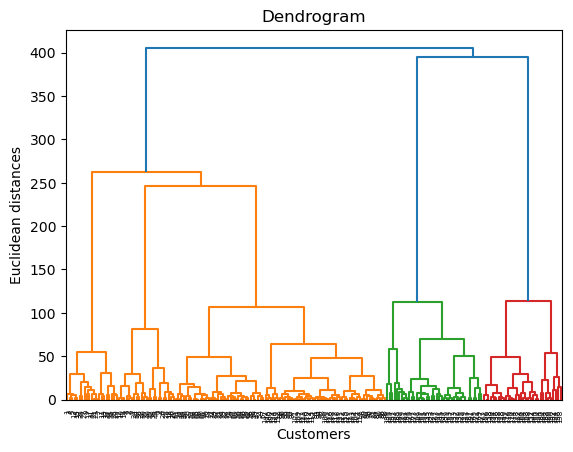

In [4]:
# Build dendogram
import scipy.cluster.hierarchy as sch

# Build dendogram using ward distance
# more info - https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Plot
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Pada dendogram, dihasilkan 3 buah cluster utama, orange, hijau, dan merah. Akan tetapi, jika kita menggunakan nilai threshold yang rendah, misal 100 - 150, maka kita akan mendapatkan 5 cluster.

Langkah 5 - Membuat Model Agglomerative

In [5]:
# Build Cluster using Agglomerative Method
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Langkah 6 - Visualisasi Cluster

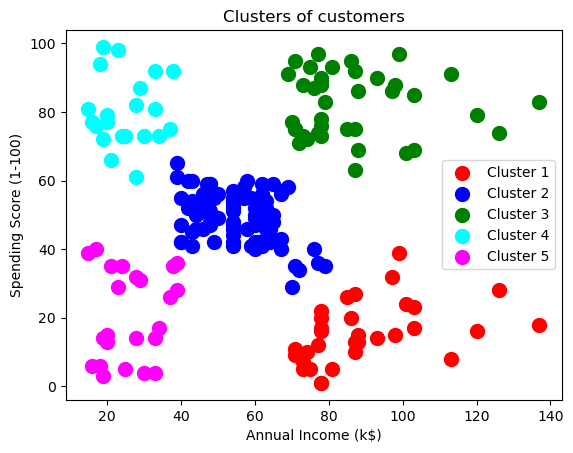

In [6]:
# Visualize The Result
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Langkah 7 - Evaluasi Hasil Cluster

In [7]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering using silhouette coefficient
silhouette_avg = silhouette_score(X, y_hc)
print(f'Silhouette Coefficient: {silhouette_avg}')

Silhouette Coefficient: 0.5529945955148897


With 3 Cluster

In [40]:
# Build Cluster using Agglomerative Method
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 7, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

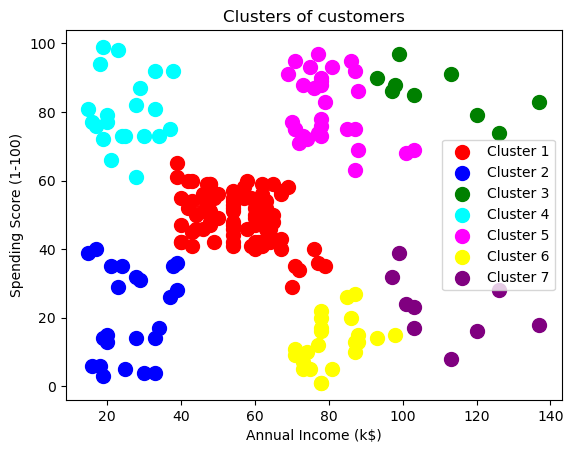

In [41]:
# Visualize The Result
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
plt.scatter(X[y_hc == 6, 0], X[y_hc == 6, 1], s = 100, c = 'purple', label = 'Cluster 7')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering using silhouette coefficient
silhouette_avg = silhouette_score(X, y_hc)
print(f'Silhouette Coefficient: {silhouette_avg}')

Silhouette Coefficient: 0.519904611908887
